In [1]:
carpetanpy = '../Final Data/npy'

In [5]:
pruebanumpypath = carpetanpy + '/S1BeatA1_recordings_norm.npy'
pruebanumpy = np.load(pruebanumpypath)
pruebanumpy.shape

(14, 123392)

Parece que cada una de los datos tienen diferentes inicios y finales, por lo que tenemos que hacer el trabajo a mano

# S1A1

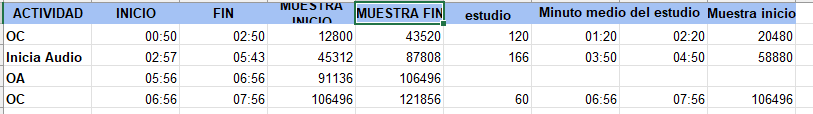

Para este caso, tenemos que con los ojos cerrados es de la muestra desde 12800 hasta 43520, además de la 106496 a 121856, mientras que para ojos abiertos es de de muestra 91136 hasta 106496. Mientras que el audio se inicia desde la muestra 45312 hasta la 87808.

In [9]:
S1A1 = np.load(carpetanpy + '/S1BeatA1_recordings_norm.npy')
S1A1.shape

(14, 123392)

In [15]:
#datos_seleccionados = S1A1[:, 12800:43520]
datos_seleccionados.shape

(14, 30720)

In [17]:
datos_seleccionados[0]

array([-0.00357253, -0.01014245, -0.02065433, ...,  0.92804305,
        0.92541508,  0.93067102])

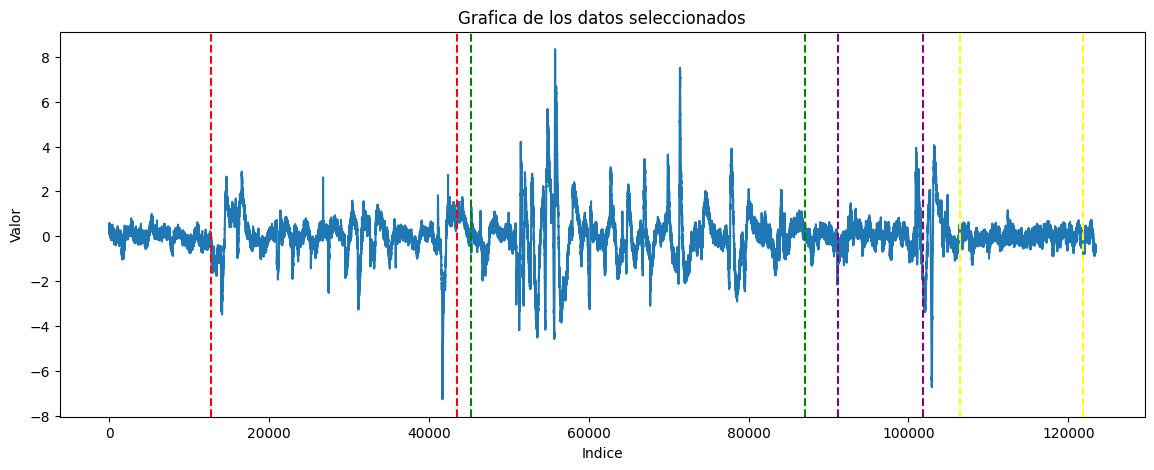

In [29]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.plot(S1A1[2])
plt.title('Grafica de los datos seleccionados')
plt.axvline(x=12800, color='r', linestyle='--')
plt.axvline(x=43520, color='r', linestyle='--')

plt.axvline(x=45312, color='g', linestyle='--')
plt.axvline(x=87008, color='g', linestyle='--')

plt.axvline(x=91136, color='purple', linestyle='--')
plt.axvline(x=101856, color='purple', linestyle='--')

plt.axvline(x=106496, color='yellow', linestyle='--')
plt.axvline(x=121856, color='yellow', linestyle='--')


plt.xlabel('Indice')
plt.ylabel('Valor')
plt.show()

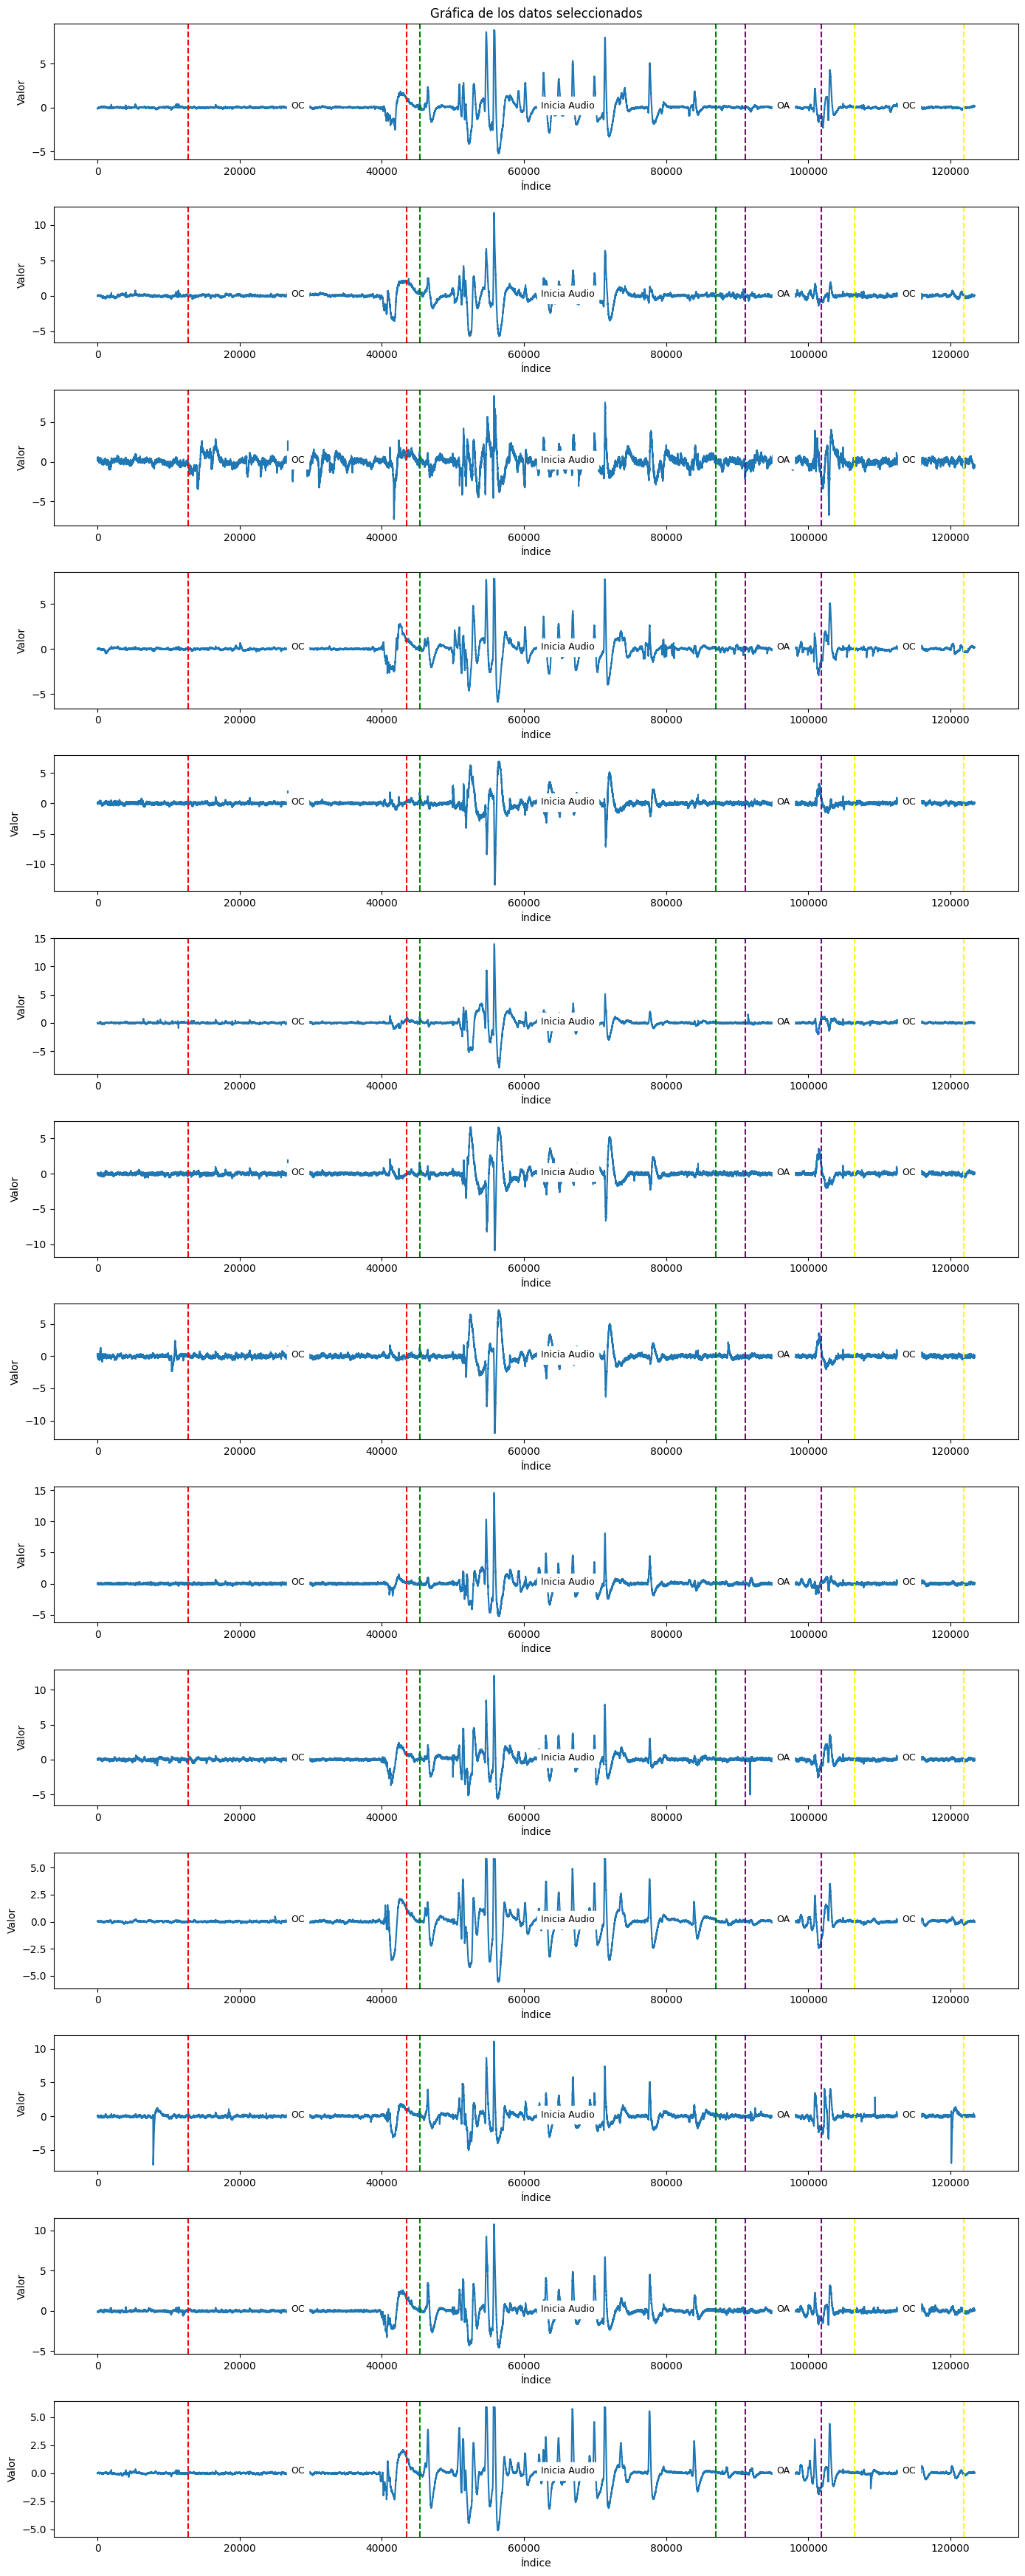

In [46]:
# Vamos a modificar el código para asegurarnos de que las etiquetas solo se coloquen una vez en cada sección delimitada por líneas del mismo color.

# Crear una figura y un conjunto de subplots
fig, axs = plt.subplots(14, 1, figsize=(14, 35)) # 14 filas, 1 columna

# Colores y posiciones de las líneas verticales que se repetirán en cada gráfico
lines_and_labels = [
    (12800, 'r', 'OC'),
    (43520, 'r', None),
    (45312, 'g', 'Inicia Audio'),
    (87008, 'g', None),
    (91136, 'purple', 'OA'),
    (101856, 'purple', None),
    (106496, 'yellow', 'OC'),
    (121856, 'yellow', None)
]

# Títulos para los ejes
axs[0].set_title('Gráfica de los datos seleccionados')
for ax in axs:
    ax.set_xlabel('Índice')
    ax.set_ylabel('Valor')

# Graficar cada fila del array en un subplot diferente y añadir las líneas verticales
for i in range(14):
    axs[i].plot(S1A1[i])
    
    # Dibujar las líneas verticales y añadir leyendas a las secciones
    for x, color, label in lines_and_labels:
        axs[i].axvline(x=x, color=color, linestyle='--')
        # Añadir la etiqueta solo si la variable 'label' no es None
        if label:
            text_x = x + (lines_and_labels[lines_and_labels.index((x, color, label)) + 1][0] - x) / 2
            axs[i].text(text_x, 0.2, label, ha='center', va='center', fontsize=9, color='black', backgroundcolor='white')

plt.tight_layout()  # Ajustar el layout para que no haya superposición de gráficas
plt.show()

Adquirimos los datos

In [59]:
path_save_OC = '../Final Data/Divided/OC/'
path_save_OA = '../Final Data/Divided/OA/'
path_save_Inicia_Audio = '../Final Data/Divided/Inicia_Audio/'

In [65]:

# Seleccionar los rangos
OC1S1A1 = S1A1[:, 12800:43520]
OC2S1A1 = S1A1[:, 106496:121856]
IAS1A1 = S1A1[:, 45312:87808]
OA1S1A1 = S1A1[:, 91136:106496]

np.save(path_save_OC + 'OC1.npy', OC1S1A1)
np.save(path_save_OC + 'OC2.npy', OC2S1A1)
np.save(path_save_Inicia_Audio + 'IA1.npy', IAS1A1)
np.save(path_save_OA + 'OA1.npy', OA1S1A1)


Viendo los datos, parece ser que están mal estructurados, parece que hay un estímulousto antes de que inicie el audio, cuando aún aparece que están los ojos cerrados, sin embargo en la tabla:
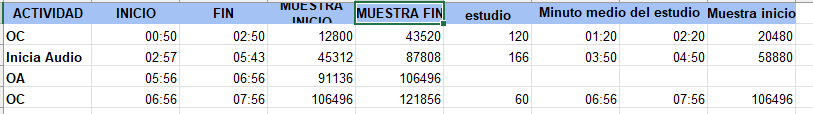
Se puede apreciar como existe otra muestra inicio y una que dice minuto medio de estudio, tal vez son esas, solo hay que multiplicar el tiemp por 256

# S2A2